# Best Markets To Advertise In

This project is taking data from a fake e-learning companies who focuses on mobile, and web development courses to understand where they can advertise in. 

The goal it to identify the two best markets where the company could advertise in if it was a real company.

In [1]:
import pandas as pd
pd.options.display.max_columns = 150

coding_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
print(coding_data.shape)
coding_data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
coding_data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

Due to the costs and level of effort assciated with a survey, I am reviewing this [data]("https://github.com/freeCodeCamp/2017-new-coder-survey") from Github which showcases data from the 2017 New Coder Survey — an anonymous survey of thousands of people who started coding less than 5 years ago. 

Last year, more than 15,000 people responded to the 2016 survey. This granted researchers and journalists an unprecedented glimpse into how people are learning to code.

In [3]:
coding_data["JobRoleInterest"].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                          11.770595
  Front-End Web Developer                                                                                                                                                                                          6.435927
  Data Scientist                                                                                                                                                                                                   2.173913
Back-End Web Developer                                                                                                                                                                                             2.030892
  Mobile Developer                                                                                                      

The data outlined above is quite granular, but from a quick glace it looks like:

* A lot of people are interested in full-stack web development, front-end web development, and back-end web development.
* A few people are interested in mobile development.
* A few people are interested in domains other than mobile, or web development. 

It is also interesting to note that many respondents have an interest in more than one subject. 

In [4]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = coding_data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It appears that about 31.7% of the participants have a clear idea about the type of programming niche they would like to work in. While the vast majority of students have mixed interests. But given that we offer courses on various ubjects, the fact that new coders have a mixed interest might actually be good.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


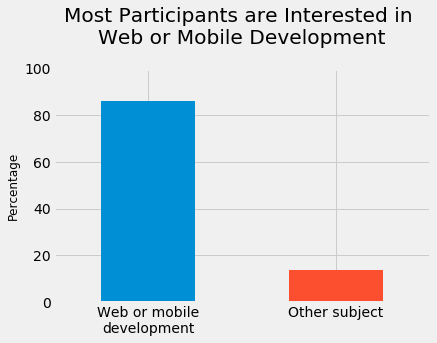

In [5]:
# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

It turns out that most of the people in the survey (roughly 86%) are interested in either web or mobile development. These figures offer a strong reason to consider this as a representative sample of the population of interest. The focus is to advertise courses to the people interested in all sorts of programming niches but mostly web and mobile development. 

Now the focus can be on figuring out what the best markets to invest money in for advertising courses. 

Now the desire is to know:
* Where are these new coders located.
* What are the locations of the greatest number of coders.
* How much money new coders are willing to spend on learning.


# New Coders - Locations and Densities

The focus on this section is to find where the new coders are located, what the densitites (how many new coders there are) for each location. This should be a good start to finding out the best two markets to run ad campaigns in.

The data set provides information about the location of reach participant at a country level. As a result, the focus will be thinking of each country as an individual market to advertise in.

To start, it is easy to examine the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). I will only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [6]:
# Isolate the participants that answered what role they'd be interested in
locations_good = coding_data[coding_data["JobRoleInterest"].notnull()].copy()

absolute_frequencies = locations_good["CountryLive"].value_counts()
relative_frequencies = locations_good["CountryLive"].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies,
                    "Percentage frequency": relative_frequencies})

,Absolute frequency,Percentage frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of potential customers are located in the United States, and this definately appears like the most interesting market. India has the second consumer density, but it is just 7.7& which is not too far from the United Kingdom (4.6%) or Canada (3.8%). 

This if useful information, but it requires further indepth analysis that this to figure out how much people are actually willing to spend on learning in those regions in particular. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be a profitable investment.  

# Spending Money on Learning

The MoneyForLearning column describes in US dollars the amount of money spent  by participants from the moment they started coding until the moment they completed the survey. The company sells subscriptions at a price of $59/month, and for this reason there's only an interest in finding out how much money each student spends per month. 

Therefore, there's a need to narrow down the analysis to only the four countries: The US, India, United Kingdom and Canada. The need to do this is for two reasons:

* These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.

* The courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

To start, it makes sense to create a new column that describes the amount of money a student has spent per month so far. To do that, there's a need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [21]:
# Replace 0s with 1s to avoid division by 0
coding_data["MonthsProgramming"].replace(0, 1, inplace = True)

# New column for the amount of money each student spends each month
coding_data["money_per_month"] = coding_data["MoneyForLearning"] / coding_data["MonthsProgramming"]
coding_data["money_per_month"].isnull().sum()

0

In [19]:
# Keep only the rows with non-nulls in the `money_per_month` column 
coding_data = coding_data[coding_data["money_per_month"].notnull()]

In [20]:
# Remove the rows with null values in 'CountryLive'
coding_data = coding_data[coding_data["CountryLive"].notnull()]

# Frequency table to check if we still have enough data
coding_data["CountryLive"].value_counts().head()

United States of America    5471
India                       1221
United Kingdom               698
Canada                       578
Brazil                       315
Name: CountryLive, dtype: int64

This should be enough, so let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [14]:
# Mean sum of money spent by students each month
countries_mean = coding_data.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    206.297711
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit suprising relative to the values for India. If consideration for a few other socio-economical metrics (like [GDP per capita](https://bit.ly/2I3cukh) , we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.